In [1]:
# Import the Boston housing dataset
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
heart_disease= pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [4]:
len(heart_disease)

303

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

np.random.seed(100)
X=heart_disease.drop("target", axis=1)
y=heart_disease["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model= LinearSVC(max_iter=1000)
model.fit(X_train, y_train)
model.score(X_test, y_test)


C:\Users\libd7\Desktop\ml_basic\env\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7049180327868853

In [6]:
predict_y= model.predict(X_test[:1])
predict_y

array([1], dtype=int64)

In [7]:
heart_disease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [8]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(100)

#create the data
X=heart_disease.drop("target", axis=1)
y=heart_disease["target"]
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model= RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
# Check the score of the model
model.score(X_test, y_test)

0.8852459016393442

## Making predictions using a machine learning model
[Prediction](https://scikit-learn.org/stable/modules/model_evaluation.html#the-scoring-parameter-defining-model-evaluation-rules)
* model defaut predict()
* sklearn.metrics

In [9]:
# testing data must be the same shape
# model.predict(np.array([1,3,1,4]))

In [10]:
model.predict(X_test)

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [11]:
np.array([y_test])

array([[1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
        0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0]], dtype=int64)

In [12]:
# Compare predictions to truth
y_preds = model.predict(X_test)
np.mean(y_preds == y_test)

0.8852459016393442

In [13]:
model.score(X_test, y_test)

0.8852459016393442

In [14]:
## using scikit learn metrics
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_preds)

0.8852459016393442

###### predict_proba() returns an array of five arrays each containing two values.
1. Each number is the probability of a label given a sample.

In [15]:
model.predict_proba(X_test[:5])

array([[0.17, 0.83],
       [0.91, 0.09],
       [0.92, 0.08],
       [0.02, 0.98],
       [0.39, 0.61]])

In [16]:
model.predict(X_test[:5])

array([1, 0, 0, 1, 1], dtype=int64)

##### Find prediction probabilities for 1 sample

In [17]:
model.predict_proba(X_test[:1])

array([[0.17, 0.83]])

In [18]:
* This output means the sample X_test[:1], the model is predicting label 1 (index 0) with a probability score of 0.83.
* Because the score is over 0.5, when using predict(), a label of 1 is assigned.

SyntaxError: invalid syntax (817366762.py, line 1)

In [19]:
# Return the label for 1 sample
model.predict(X_test[:1])

array([1], dtype=int64)

* Where does 0.5 come from?
* Because our problem is a binary classification task (heart disease or not heart disease), predicting a label with 0.5 probability every time would be the same as a coin toss (guessing). Therefore, once the prediction probability of a sample passes 0.5, for a certain label, it's assigned that label.

## 4. Evaluating a model
Once you've trained a model, you'll want a way to measure how trustworthy its predictions are.

Scikit-Learn implements 3 different methods of evaluating models.

The score() method. Calling score() on a model instance will return a metric assosciated with the type of model you're using. The metric depends on which model you're using.
The scoring parameter. This parameter can be passed to methods such as cross_val_score() or GridSearchCV() to tell Scikit-Learn to use a specific type of scoring metric.
Problem-specific metric functions. Similar to how the scoring parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.
The scoring function you use will also depend on the problem you're working on.

Classification problems have different evaluation metrics and scoring functions to regression problems.

Let's look at some examples.

#### Using RandomForestClassifier for Classification

In [20]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(100)

#create the data
X=heart_disease.drop("target", axis=1)
y=heart_disease["target"]
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model= RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
# Check the score of the model
model.score(X_test, y_test)

0.8852459016393442

In [21]:
model.score(X_train, y_train)

1.0

In [22]:
model.score(X_test, y_test)

0.8852459016393442

### Using RandomForestReggresor for  Reggression Evaluation

In [23]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(100)

#create the data
X=heart_disease.drop("target", axis=1)
y=heart_disease["target"]
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model= RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)
# Check the score of the model
model.score(X_test, y_test)

0.5522111471861472

In [24]:
model.score(X_train, y_train)

0.9185645185957595

In [25]:
model.score(X_test, y_test)

0.5522111471861472

#### 4.2 Evaluating your models using the scoring parameter
The next step up from using score() is to use a custom scoring parameter with **cross_val_score() or GridSearchCV**.

As you may have guessed, the scoring parameter you set will be different depending on the problem you're working on.

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

np.random.seed(100)

#create the data
X=heart_disease.drop("target", axis=1)
y=heart_disease["target"]
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model= RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train);

In [27]:
# Check the score of the model
model.score(X_test, y_test)

0.8852459016393442

In [28]:
cross_val_score(model, X, y, cv=5)

array([0.81967213, 0.8852459 , 0.83606557, 0.81666667, 0.76666667])

###### Why we need cross validation?
We've dealt with Figure 1.0 before using score(X_test, y_test). But looking deeper into this, if a model is trained using the training data or 80% of samples, this means 20% of samples aren't used for the model to learn anything.

This also means depending on what 80% is used to train on and what 20% is used to evaluate the model, it may achieve a score which doesn't reflect the entire dataset. For example, if a lot of easy examples are in the 80% training data, when it comes to test on the 20%, your model may perform poorly. The same goes for the reverse.

Figure 2.0 shows 5-fold cross-validation, a method which tries to provide a solution to:

Not training on all the data
*Avoiding getting lucky scores on single splits of the data
*Instead of training only on 1 training split and evaluating on 1 testing split, 5-fold cross-validation does it 5 times. On a *different split each time, returning a score for each.

In [29]:
np.random.seed(42)

# Single training and test split score
clf_single_score = model.score(X_test, y_test)

# Take mean of 5-fold cross-validation
clf_cross_val_score = np.mean(cross_val_score(model, X, y, cv=5))

clf_single_score, clf_cross_val_score

(0.8852459016393442, 0.8248087431693989)

In this case, if you were asked to report the **accuracy of your model, even though it's lower,** you'd prefer the **cross-validated metric** over the non-cross-validated metric.

### 4.2.1 Classification model evaluation metrics
Four of the main evaluation metrics/methods you'll come across for classification models are:

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

#### 4.2.1.1 Accuracy

In [30]:
# Import cross_val_score from the model_selection module
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train);

In [31]:
clf.score(X_test, y_test)

0.8524590163934426

In [ ]:
cross_val_score= cross_val_score(clf, X,y, cv=10)
cross_val_score

In [ ]:
np.mean(cross_val_score)

In [ ]:
print(f"Heart Disease Classifier Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

#### 4.2.1.2 Area Under Receiver Operating Characteristic (ROC) Curve
If this one sounds like a mouthful, its because reading the full name is.

It's usually referred to as AUC for Area Under Curve and the curve they're talking about is the Receiver Operating Characteristic or ROC for short.

So if hear someone talking about AUC or ROC, they're probably talking about what follows.

ROC curves are a comparison of true postive rate (tpr) versus false positive rate (fpr).

For clarity:

1. True positive = model predicts 1 when truth is 1
2. False positive = model predicts 1 when truth is 0
3. True negative = model predicts 0 when truth is 0
4. False negative = model predicts 0 when truth is 1
Now we know this, let's see one. Scikit-Learn lets you calculate the information required for a ROC curve using the **roc_curve** function.

In [ ]:
# Area under Roc Curve
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs[:10], len(y_probs)

In [ ]:
y_probs = y_probs[:, 1]
y_probs

In [ ]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)# roc_curve(y_true, y_score)

In [ ]:
# Check the false positive rate
fpr

In [ ]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positve rate (fpr) and 
    true postive rate (tpr) of a classifier.
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Guessing')
    # Customize the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

* The most ideal position for a ROC curve to run along the top left corner of the plot.

* This would mean the model predicts only true positives and no false positives. And would result in a ROC AUC score of 1.0.

* You can see this by creating a ROC curve using only the y_test labels.

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs)

In [ ]:
# Plot perfect ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In reality, a perfect ROC curve is unlikely.

In [ ]:
# Perfect ROC AUC score
roc_auc_score(y_test, y_test)

#### 4.2.1.3 Confusion Matrix
A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict. In essence, giving you an idea of where the model is getting confused.

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

In [ ]:
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

###### M-1: Creating a confusion matrix using Seaborn heatmap()

In [ ]:
# How to install missing Package into the current envirnment from a jupyter notebook
# import sys
# !conda install --yes --prefix {sys.prefix} seaborn

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
conf_matrics= confusion_matrix(y_test, y_preds)
sns.heatmap(conf_matrics)

###### M-2: Creating a confusion matrix using Scikit-Learn
Scikit-Learn has multiple different implementations of plotting confusion matrices:

* sklearn.metrics.ConfusionMatrixDisplay.from_estimator(estimator, X, y) - this takes a fitted estimator (like our clf model), features (X) and labels (y), it then uses the trained estimator to make predictions on X and compares the predictions to y by displaying a confusion matrix.
* sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred) - this takes truth labels and predicted labels and compares them by displaying a confusion matrix.

To check your version of Scikit-Learn run:

import sklearn
sklearn.__version__

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred= y_preds);

### Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

It returns four columns: precision, recall, f1-score and support.

The number of rows will depend on how many different classes there are. But there will always be three rows labell accuracy, macro avg and weighted avg.

Each term measures something slightly different:

1. Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.
2. Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.
3. F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.
4. Support - The number of samples each metric was calculated on.
5. Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0, in other words, getting the prediction right 100% of the time.
6. Macro avg - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't take class imbalance into effect. So if you do have class imbalances (more examples of one class than another), you should pay attention to this.
7. Weighted avg - Short for weighted average, the weighted average precision, recall and F1 score between classes. Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g. it will give a high value when one class out performs another due to having more samples).

**When should you use each?**

It can be tempting to base your classification models perfomance only on accuracy. And accuracy is a good metric to report, except when you have very imbalanced classes.

For example, let's say there were 10,000 people. And 1 of them had a disease. You're asked to build a model to predict who has it.

You build the model and find your model to be 99.99% accurate. Which sounds great! ...until you realise, all its doing is predicting no one has the disease, in other words all 10,000 predictions are false.

In this case, you'd want to turn to metrics such as precision, recall and F1 score.

In [ ]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one case

disease_preds = np.zeros(10000) # every prediction is 0

pd.DataFrame(classification_report(disease_true, 
                                   disease_preds, 
                                   output_dict=True,
                                   zero_division=0))

### 4.2.2 Regression model evaluation metrics
Similar to classification, there are several metrics you can use to evaluate your regression models.

We'll check out the following.

- **R^2 (pronounced r-squared) or coefficient of determination** - Compares your models predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.
- **Mean absolute error (MAE)** - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.
- **Mean squared error (MSE)** - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

Let's see them in action. First, we'll bring down our regression model code again.

In [ ]:
# Import the RandomForestRegressor model class from the ensemble module
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train);

In [52]:
model.score(X_test, y_test)

0.5106393318965518

- Outside of the score() function, R^2 can be calculated using Scikit-Learn's r2_score() function.

* A model which only predicted the mean would get a score of 0.

In [53]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())

r2_score(y_test, y_test_mean)

0.0

And a perfect model would get a score of 1.

In [55]:
r2_score(y_test, y_test)

1.0

- For your regression models, you'll want to maximise R^2, whilst minimising MAE and MSE.

**Mean Absolute Error (MAE):**
A model's mean absolute error can be calculated with Scikit-Learn's mean_absolute_error() function.

In [87]:
# Mean absolute error
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.23754098360655734

Our model achieves an MAE of 0.237 This means, on average our models predictions are 0.3265 units away from the actual value.

In [88]:
y_preds

array([0.03, 0.58, 0.47, 0.13, 0.81, 0.86, 0.73, 0.03, 0.01, 0.45, 0.95,
       0.21, 0.85, 0.12, 0.89, 0.99, 0.99, 0.05, 0.07, 0.01, 0.6 , 0.05,
       0.88, 0.66, 0.63, 0.52, 0.83, 0.82, 0.06, 0.92, 0.09, 0.02, 0.  ,
       0.27, 0.54, 0.03, 0.39, 0.83, 0.62, 0.97, 0.91, 0.88, 0.95, 0.54,
       0.68, 0.18, 0.75, 1.  , 0.13, 0.  , 0.08, 0.19, 0.89, 0.76, 0.2 ,
       0.06, 0.52, 0.99, 0.03, 0.  , 0.07])

In [89]:
df = pd.DataFrame(data={"actual values": y_test, 
                   "predictions": y_preds})
df["differences"]=df["predictions"]-df["actual values"]
df[:10]

,actual values,predictions,differences
179,0,0.03,0.03
228,0,0.58,0.58
111,1,0.47,-0.53
246,0,0.13,0.13
60,1,0.81,-0.19
9,1,0.86,-0.14
119,1,0.73,-0.27
223,0,0.03,0.03
268,0,0.01,0.01
33,1,0.45,-0.55


In [90]:
# MAE using formulas and difference
np.abs(df["differences"]).mean()

0.23754098360655734

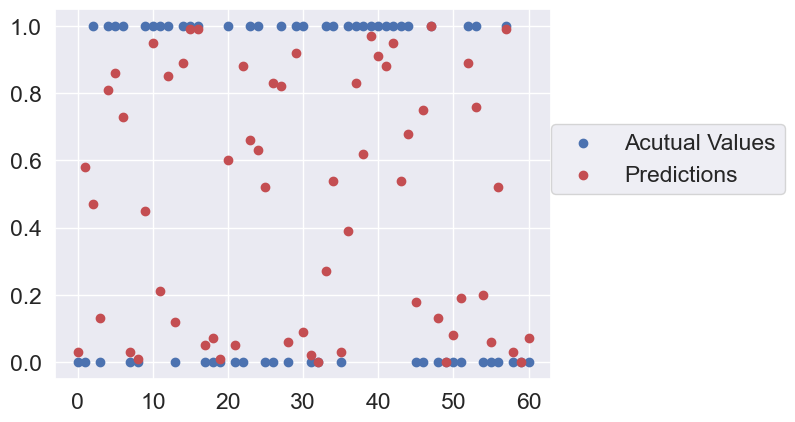

In [91]:
fig, ax = plt.subplots()
x = np.arange(0, len(df), 1)
ax.scatter(x, df["actual values"], c='b', label="Acutual Values")
ax.scatter(x, df["predictions"], c='r', label="Predictions")
ax.legend(loc=(1, 0.5));

### MSE using forrmula

In [92]:
df["squared_differences"]= np.square(df["differences"])
df[:10]

,actual values,predictions,differences,squared_differences
179,0,0.03,0.03,0.0009
228,0,0.58,0.58,0.3364
111,1,0.47,-0.53,0.2809
246,0,0.13,0.13,0.0169
60,1,0.81,-0.19,0.0361
9,1,0.86,-0.14,0.0196
119,1,0.73,-0.27,0.0729
223,0,0.03,0.03,0.0009
268,0,0.01,0.01,0.0001
33,1,0.45,-0.55,0.3025


In [120]:
squared= np.square(df["squared_differences"])
squared.mean()

0.057622439836065575

In [121]:
df_large_error= df.copy()
df_large_error.iloc[0, df_large_error.columns.get_loc("squared_differences")]=16

In [122]:
df_large_error.head()

,actual values,predictions,differences,squared_differences
179,0,0.03,0.03,16.0000
228,0,0.58,0.58,0.3364
111,1,0.47,-0.53,0.2809
246,0,0.13,0.13,0.0169
60,1,0.81,-0.19,0.0361


In [123]:
df_large_error["squared_differences"].mean()

0.38432459016393444

In [ ]:
# scikit learn algorithm

In [124]:
# Mean squared error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

0.12204426229508197

### MSE will always be higher than MAE because is squares the errors rather than only taking the absolute difference into account.

Now you might be thinking, which regression evaluation metric should you use?

- R^2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R^2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.
- MAE gives a better indication of how far off each of your model's predictions are on average.
- As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).
- Pay more attention to MAE: When being `$10,000`  off is **twice** as bad as being `$5,000 off`.
- Pay more attention to MSE: When being `$10,000` off is **more than twice** as bad as being `$5,000 off.`
- Note: What we've covered here is only a handful of potential metrics you can use to evaluate your models. If you're after a complete list, check out the Scikit-Learn metrics and scoring documentation.

### 4.2.3 Finally using the scoring parameter
Woah. We've covered a bunch but haven't even touched the scoring parameter...

As a refresh, the scoring parameter can be used with a function like cross_val_score() to tell Scikit-Learn what evaluation metric to return using cross-validation.
### 4.2.3.1 Classsificaton

In [125]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [126]:
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [127]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [128]:
####### Accurecy
np.random.seed(42)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [129]:
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
print(f"The cross-validated precision is: {np.mean(cv_precision):.2f}")

The cross-validated precision is: 0.83


In [130]:
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
print(f"The cross-validated recall is: {np.mean(cv_recall):.2f}")

The cross-validated recall is: 0.85


In [131]:
np.random.seed(42)
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
print(f"The cross-validated F1 score is: {np.mean(cv_f1):.2f}")

The cross-validated F1 score is: 0.84


## 4.2.3.2To do in regressor model in our housing data sets

## 4.3 Using different evaluation metrics with Scikit-Learn
Remember the third way of evaluating Scikit-Learn functions?

- Problem-specific metric functions. Similar to how the scoring parameter can be passed different scoring functions, Scikit-Learn implements these as stand alone functions.
- Well, we've kind of covered this third way of using evaulation metrics with Scikit-Learn.

- In essence, all of the metrics we've seen previously have their own function in Scikit-Learn.

- They all work by comparing an array of predictions, usually called y_preds to an array of actual labels, usually called y_test or y_true.

### 4.3 1 Classification functions
For:

1. Accuracy we can use accuracy_score()
2. Precision we can use precision_score()
3. Recall we can use recall_score()
4. F1 we can use f1_score()

In [132]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print("Classifier metrics on the test set:")
print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds):.2f}")
print(f"Recall: {recall_score(y_test, y_preds):.2f}")
print(f"F1: {f1_score(y_test, y_preds):.2f}")

Classifier metrics on the test set:
Accuracy: 85.25%
Precision: 0.85
Recall: 0.88
F1: 0.86


### 4.3.2 Regression metrics (Housing data sets)
- R^2 we can use r2_score()
- MAE (mean absolute error) we can use mean_absolute_error()
- MSE (mean squared error) we can use mean_squared_error()

# 5. Improving model predictions through experimentation (hyperparameter tuning)
The first predictions you make with a model are generally referred to as baseline predictions. The same goes with the first evaluation metrics you get. These are generally referred to as baseline metrics.

Your next goal is to improve upon these baseline metrics.

Two of the main methods to improve baseline metrics are from a data perspective and a model perspective.

1. From a data perspective asks:

    - Could we collect more data? In machine learning, more data is generally better, as it gives a model more opportunities to learn patterns.
    - Could we improve our data? This could mean filling in misisng values or finding a better encoding (turning things into numbers) strategy.
    
2. From a model perspective asks:

    - Is there a better model we could use? If you've started out with a simple model, could you use a more complex one? (we saw an example of this when looking at the Scikit-Learn machine learning map, ensemble methods are generally considered more complex models)
    - Could we improve the current model? If the model you're using performs well straight out of the box, can the hyperparameters be tuned to make it even better?

**Note:** Patterns in data are also often referred to as data parameters. The difference between parameters and hyperparameters is a machine learning model seeks to find parameters in data on its own, where as, hyperparameters are settings on a model which a user (you) can adjust.

Since we have two existing datasets, we'll come at exploration from a model perspective.

More specifically, we'll look at how we could improve our RandomForestClassifier and RandomForestRegressor models through hyperparameter tuning.

What even are hyperparameters?

In [133]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

When you instantiate a model like above, you're using the default hyperparameters.

These get printed out when you call the model instance and get_params().

In [134]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

You'll see things like max_depth, min_samples_split, n_estimators.

Each of these is a hyperparameter of the RandomForestClassifier you can adjust.
We'll try tuning these as well as:
- max_features (the number of features to consider when looking for the best split)
- max_depth (the maximum depth of the tree)
- min_samples_leaf (the minimum number of samples required to be at a leaf node)

If this still sounds like a lot, the good news is, the process we're taking with the Random Forest and tuning its hyperparameters, can be used for other machine learning models in Scikit-Learn. The only difference is, with a different model, the hyperparameters you tune will be different.

To get familar with hyparameter tuning, we'll take our RandomForestClassifier and adjust its hyperparameters in 3 ways.

1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

## 5.1 Tuning hyperparameters by hand

In [135]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**And we're going to adjust:**

- max_depth
- max_features
- min_samples_leaf
- min_samples_split
- n_estimators

1. We'll use the same code as before, except this time we'll create a training, validation and test split.
2. With the training set containing 70% of the data and the validation and test sets each containing 15%.
3. Let's get some baseline results, then we'll tune the model.

And since we're going to be evaluating a few models, let's make an evaluation function.



In [152]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [157]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease = pd.read_csv("data/heart-disease.csv").sample(frac=1)

# Split into X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data into train, validation & test sets
train_split = round(0.7 * len(heart_disease)) # 70% of data
valid_split = round(train_split + 0.15 * len(heart_disease)) # 15% of data
X_train, y_train = X.loc[:train_split], y.loc[:train_split]
X_valid, y_valid = X.loc[train_split:valid_split], y.loc[train_split:valid_split]
X_test, y_test = X.loc[valid_split:], y.loc[valid_split:]

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_valid)

# Evaluate the classifier
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 90.91%
Precision: 0.88
Recall: 0.92
F1 score: 0.90


{'accuracy': 0.91, 'precision': 0.88, 'recall': 0.92, 'f1': 0.9}

In [159]:
np.random.seed(42)

# Create a second classifier
clf_2 = RandomForestClassifier(n_estimators=200)
clf_2.fit(X_train, y_train)

# Make predictions
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 90.91%
Precision: 0.88
Recall: 0.92
F1 score: 0.90


## 5.2 Hyperparameter tuning with [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)

Scikit-Learn's RandomizedSearchCV allows us to randomly search across different hyperparameters to see which work best. It also stores details about the ones which work best!

**First,** we create a grid (dictionary) of hyperparameters we'd like to search over.

In [165]:
# Hyperparameter grid RandomizedSearchCV will search over
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

- How many models will it test?
    As many as there are for each combination of hyperparameters to be tested. Let's add them up.
    max_depth has 4, max_features has 2, min_samples_leaf has 3, min_samples_split has 3, n_estimators has 5. That's 4x2x3x3x5 = 360 models!

Or...

- We can set the n_iter parameter to limit the number of models RandomizedSearchCV tests.
- The results we get will be cross-validated (hence the CV in RandomizedSearchCV) so we can use train_test_split().

- And since we're going over so many different models, we'll set n_jobs to -1 of RandomForestClassifier so Scikit-Learn takes advantage of all the cores (processors) on our computers.

In [166]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set n_jobs to -1 to use all cores (NOTE: n_jobs=-1 is broken as of 8 Dec 2019, using n_jobs=1 works)
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=20, # try 20 models total
                            cv=5, # 5-fold cross-validation
                            verbose=2) # print out results

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  10.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   8.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   8.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   9.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   7.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimato

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   2.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   2.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   2.1s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   3.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=500; total time=   4.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, max_features=

In [168]:
# Find the best hyperparameters found by RandomizedSearchCV
rs_clf.best_params_

{'n_estimators': 500,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20}

In [169]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


### 5.3 Hyperparameter tuning with GridSearchCV
The main difference between GridSearchCV and RandomizedSearchCV is GridSearchCV searches across a grid of hyperparamters exhaustively, where as, RandomizedSearchCV searches across a grid of hyperparameters randomly (stopping after n_iter combinations).

For example, let's see our grid of hyperparameters.

In [170]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

RandomizedSearchCV try n_iter combinations of different values. Where as, GridSearchCV will try every single possible combination.

And if you remember from before when we did the calculation: max_depth has 4, max_features has 2, min_samples_leaf has 3, min_samples_split has 3, n_estimators has 5.

That's 4x2x3x3x5 = 360 models!

This could take a long time depending on the power of the computer you're using, the amount of data you have and the complexity of the hyperparamters (usually higher values means a more complex model).

In our case, the data we're using is relatively small (only ~300 samples).

Since we've already tried to find some ideal hyperparameters using RandomizedSearchCV, we'll create another hyperparameter grid based on the best_params_ of rs_clf* with less options and then try to use GridSearchCV to find a more ideal set.

Note: Based on the best_params_ of rs_clf implies the next set of hyperparameters we'll try are roughly in the same range of the best set found by RandomizedSearchCV.

In [171]:
# Another hyperparameter grid similar to rs_clf.best_params_
grid_2 = {'n_estimators': [1200, 1500, 2000],
          'max_depth': [None, 5, 10],
          'max_features': ['sqrt'],
          'min_samples_split': [4, 6],
          'min_samples_leaf': [1, 2]}

We've created another grid of hyperparameters to search over, this time with less total.

n_estimators has 3, max_depth has 3, max_features has 2, min_samples_leaf has 2, min_samples_split has 2.

That's 3x3x2x2x2 = 72 models in total. Or about 5 times less (360/72) combinations of hyperparameters less than our original grid.

Now when we run GridSearchCV, passing it our classifier (clf), paramter grid (grid_2) and the number of cross-validation folds we'd like to use (cv), it'll create a model with every single combination of hyperparameters, 72 in total, and check the results.

In [172]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Set n_jobs to -1 to use all cores (NOTE: n_jobs=-1 is broken as of 8 Dec 2019, using n_jobs=1 works)
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                      param_grid=grid_2,
                      cv=5, # 5-fold cross-validation
                      verbose=2) # print out progress

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   4.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   6.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   5.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   5.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1200; total time=   5.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time=   6.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time=   8.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_s

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time=   8.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time=   6.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=1500; total time=   9.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2000; total time=  14.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2000; total time=  14.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2000; total time=  14.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2000; total time=  14.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=2000; total time=   9.5s
[CV] END max_depth=5, max_features=sqrt,

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   5.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   5.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   5.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1200; total time=   5.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500; total time=   6.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500; total time=   6.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500; total time=   6.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=1500; total time=   7.0s
[CV] END max_depth=10, max_featu

In [173]:
# Check the best hyperparameters found with GridSearchCV
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 1500}

In [174]:
# Max predictions with the GridSearchCV classifier
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 80.33%
Precision: 0.75
Recall: 0.86
F1 score: 0.80


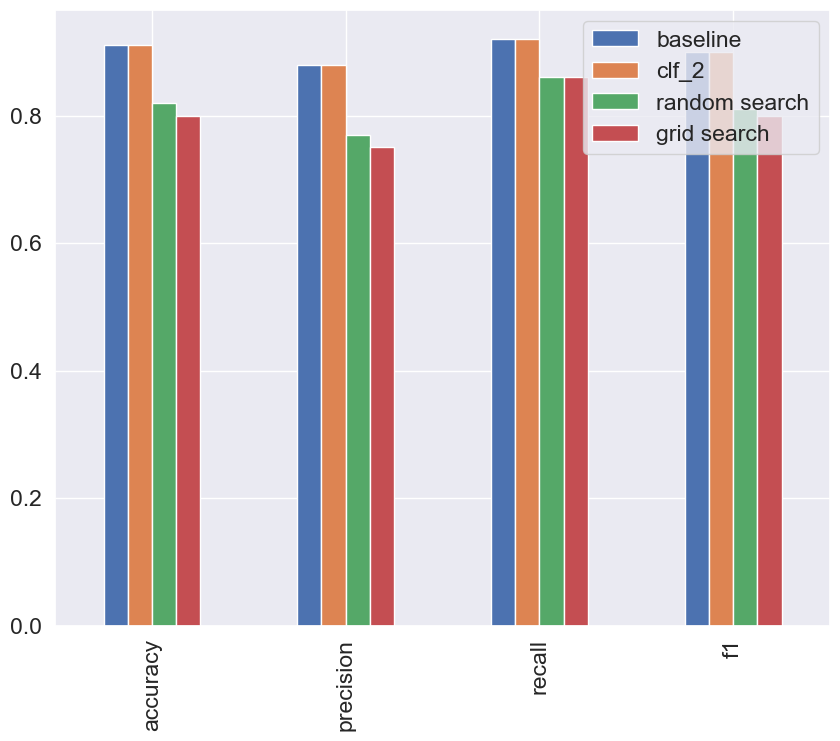

In [175]:
compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random search": rs_metrics,
                                "grid search": gs_metrics})
compare_metrics.plot.bar(figsize=(10, 8));

It seems, even after trying 72 different combinations of hyperparamters, we don't get an improvement in results.

These things might happen. But it's important to remember, it's not over. There may be more we can do.

In a hyperparameter tuning sense, there may be a better set we could find through more extensive searching with RandomizedSearchCV and GridSearchCV but it's likely these improvements will be marginal.

A few next ideas you could try:

Collecting more data - Based on the results our models are getting now, it seems like they're finding some patterns. Collecting more data may improve a models ability to find patterns. However, your ability to do this will largely depend on the project you're working on.
Try a more advanced model - Although our tuned Random Forest model is doing pretty well, a more advanced ensemble method such as XGBoost or CatBoost might perform better.
Since machine learning is part engineering, part science, these kind of experiments are common place in any machine learning project.

Now you've got a somewhat tuned Random Forest model, the next thing you might want to do is export it and save it so you could share it with your team or use it in an application without having to retrain it.

## 6. Saving and loading trained machine learning models
Since our GridSearchCV model has the best results so far, we'll export it and save it to file.

#### 6.1 Saving and loading a model with pickle
We saw right at the start, one way to save a model is using Python's pickle module.

We'll use pickle's dump() function and pass it our model, gs_clf, along with the open() function containing a string for the filename we want to save our model as, along with the "wb" string which stands for "write binary", which is the file type open() will write our model as.

In [176]:
import pickle

# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [177]:
# Load a saved model
loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [178]:
# Make predictions and evaluate the loaded model
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 80.33%
Precision: 0.75
Recall: 0.86
F1 score: 0.80


{'accuracy': 0.8, 'precision': 0.75, 'recall': 0.86, 'f1': 0.8}

### 6.2 Saving and loading a model with joblib
The other way to load and save models is with joblib. Which works relatively the same as pickle.

To save a model, we can use joblib's dump() function, passing it the model (gs_clf) and the desired filename.

In [179]:
from joblib import dump, load

# Save a model to file
dump(gs_clf, filename="gs_random_forest_model_1.joblib")

['gs_random_forest_model_1.joblib']

In [180]:
# Import a saved joblib model
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [181]:
# Make and evaluate joblib predictions 
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 80.33%
Precision: 0.75
Recall: 0.86
F1 score: 0.80


{'accuracy': 0.8, 'precision': 0.75, 'recall': 0.86, 'f1': 0.8}

- Which one should you use, pickle or joblib?

According to Scikit-Learn's documentation, they suggest it may be more efficient to use joblib as it's more efficient with large numpy array (which is what may be contained in trained/fitted Scikit-Learn models).

Either way, they both function fairly similar so deciding on which one to use, shouldn't cause too much of an issue.

### 7. Revisit the pipeline one more time, knowing what we know now
We've covered a lot. And so far, it seems to be all over the place, which it is. But not to worry, machine learning projects often start out like this. A whole bunch of experimenting and code all over the place at the start and then once you've found something which works, the refinement process begins.

What would this refinement process look like?

We'll use the car sales regression problem (predicting the sale price of cars) as an example.

To tidy things up, we'll be using Scikit-Learn's Pipeline class. You can imagine Pipeline as being a way to string a number of different Scikit-Learn processes together.

### 7.1 Creating a regression Pipeline
You might recall when, way back in Section 2: Getting Data Ready, we dealt with the car sales data, to build a regression model on it, we had to encode the categorical features into numbers and fill the missing data.

The code we used worked, but it was a bit all over the place. Good news is, Pipeline can help us clean it up.

In [1]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

In [3]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [4]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [5]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

There's 1000 rows, three features are categorical (Make, Colour, Doors), the other two are numerical (Odometer (KM), Price) and there's 249 missing values.

We're going to have to turn the categorical features into numbers and fill the missing values before we can fit a model.

We'll build a Pipeline() to do so.

Pipeline()'s main input is steps which is a list ([(step_name, action_to_take)]) of the step name, plus the action you'd like it to perform.

In our case, you could think of the steps as:

- Fill missing data
- Convert data to numbers
- Build a model on the data

In [6]:
# Setup random seed
import numpy as np
np.random.seed(42)


In [9]:
# Import data and drop the rows with missing labels
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipelines
categorical_features = ["Make", "Colour"]

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean"))
])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, categorical_features),
        ("door", door_transformer, door_feature),
        ("num", numeric_transformer, numeric_features)])

# Create a preprocessing and modelling pipeline
model = Pipeline(steps=[("preprocessor", preprocessor),
                        ("model", RandomForestRegressor())])

# Split data
X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

In [13]:
# Using grid search with pipeline
pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["sqrt"],
    "model__min_samples_split": [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.8s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.6s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.6s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.7s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.5s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.4s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.3s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   4.9s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   4.5s
[CV] END model__max_depth=5, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strat

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [14]:
# Score the best model
gs_model.score(X_test, y_test)

0.2869202244526716

[Gitlink](https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/section-2-data-science-and-ml-tools/introduction-to-scikit-learn.ipynb)